In [3]:
#Impoting required Libraries
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import librosa


from sklearn.model_selection import train_test_split, cross_val_score
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

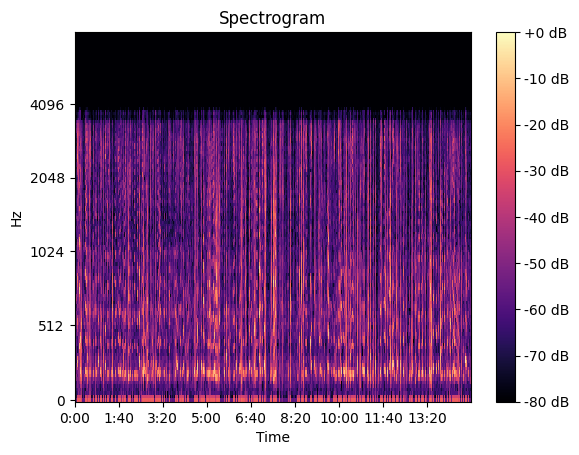

In [7]:
#audio_data = (r"C:\0638.wav")
audio_data

# Load the audio file
#audio_data, sr = librosa.load(r"C:\0638.wav")

# Create a spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128, fmax=8000)

# Convert power spectrogram to dB scale
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Display the spectrogram
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


A spectrogram is a graphic depiction of the frequency spectrum of a sound stream as it changes over time. A spectrogram can be used in audio sentiment analysis to extract elements from the audio stream that are helpful in determining the speaker's sentiment.

We can recognise patterns in the audio input that correlate to various emotions by analysing the spectrogram. We could discover, for instance, that specific frequencies or combinations of frequencies are more common in speech related to anger or happiness. The sentiment of fresh audio samples may then be predicted using a machine learning model that has been trained using these patterns.

In [ ]:
# Obtained in Step 2
API_key = "e089d633fdba469384ac292227f864bd"

# Location of fie on computer
file = (r'C:\Users\harsh\DATASET\[YT2mp3.info] - _ Customer complains about Customer Service (320kbps).mp3')

#Step 3.3: declare Upload Endpoint

headers = {
    'authorization': "e089d633fdba469384ac292227f864bd", 
    'content-type': 'application/json',
}

endpoint = 'https://api.assemblyai.com/v2/upload'

#Step 3.4: upload function

def read_file(file):

    with open(file, 'rb') as f:
        while True:
            data = f.read(5_242_880)
            if not data:
                break
            yield data
            
res_upload = requests.post(
    endpoint, 
    headers=headers, 
    data=read_file(file)
)

print(res_upload.json())

upload_url = res_upload.json().get('upload_url')
{'upload_url': 'https://cdn.assemblyai.com/upload/e089d633fdba469384ac292227f864bd'}    

<h2>ASSEMBLY_AI INTEGRATION </h2>

Here I used AssemblyAI API which I integrated in my code which is used basically to convert audio to text conversion of call_recordings this automates the process and makes easy for sentiment analysis of the audio.

In [ ]:
import requests
import json
import pandas as pd
import os
from time import sleep

# API key by  AssemblyAI
API_key = "e089d633fdba469384ac292227f864bd"

# directory containing the audio files
audio_dir = r"C:\Users\harsh\DATASET"

# upload function
def read_file(file):
    with open(file, 'rb') as f:
        while True:
            data = f.read(5_242_880)
            if not data:
                break
            yield data

# Define function to label a single audio file
def label_audio_file(file_path, headers):
    # Step 3.3: Specify Upload Endpoint
    endpoint = 'https://api.assemblyai.com/v2/upload'

    # Upload the audio file
    res_upload = requests.post(endpoint, headers=headers, data=read_file(file_path))
    upload_url = res_upload.json().get('upload_url')

    #  Endpoint and request a transcription
    endpoint = "https://api.assemblyai.com/v2/transcript"
    json = {
        "audio_url": upload_url,
        "sentiment_analysis": True,
        "speaker_labels": True
    }
    response = requests.post(endpoint, json=json, headers=headers)
    response_id = response.json()['id']

    # Poll the transcription status until it is completed
    current_status = "queued"
    endpoint = f"https://api.assemblyai.com/v2/transcript/{response_id}"
    while current_status not in ("completed", "error"):
        response = requests.get(endpoint, headers=headers)
        current_status = response.json()['status']
        if current_status not in ("completed", "error"):
            sleep(10)

    # Extract the labeled data from the transcription response
    
    # Convert the labeled data to a pandas dataframe
    sent_data = pd.DataFrame(sent_data, 
                             columns=["SentenceID", "Text", "Duration", 
                                      "Speaker", "Sentiment"])
    return sent_data

# Loop through each audio file in the specified directory and label it
all_data = []
for file_name in os.listdir(audio_dir):
    if file_name.endswith(".mp3") or file_name.endswith(".wav"):
        file_path = os.path.join(audio_dir, file_name)
        headers = {"authorization": API_key}
        data = label_audio_file(file_path, headers)
        data["Filename"] = file_name
        all_data.append(data)

# make together i.e concatenate the labeled data for all audio files into a single dataframe
labeled_data = pd.concat(all_data, ignore_index=True)

# Save the labeled data to a CSV file
labeled_data.to_csv("labeled_data.csv", index=False)


Here in this code cell I used AssemblyAI API to send my audio files on server of AssemblyAI and convert audio files into text Assembly AI used <b>Text to Speech</b> to convert the audio into text and then make sentiment using AI function whole process is automated and then it analyzes the no. of users involved in conversation and there conversation indivdually are analyzed and stored in CSV file.





<>





In [4]:
data = pd.read_csv("labeled_data.csv")
data.head()

,SentenceID,Text,Duration,Speaker,Sentiment,Filename
0,1,Who the hell is calling now?,1.670,A,NEGATIVE,112XAB_009_Customer.mp3
1,2,This is Joshua.,0.872,A,NEUTRAL,112XAB_009_Customer.mp3
2,3,"Hello, Joshua.",0.592,B,NEUTRAL,112XAB_009_Customer.mp3
3,4,This is Emmanuel from Hypernary National Bank.,2.272,B,NEUTRAL,112XAB_009_Customer.mp3
4,5,From the collection.,1.012,B,NEUTRAL,112XAB_009_Customer.mp3


In [16]:
len(data)

2477

<h1>EDA PART</h1>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SentenceID  2477 non-null   int64  
 1   Text        2477 non-null   object 
 2   Duration    2477 non-null   float64
 3   Speaker     2477 non-null   object 
 4   Sentiment   2477 non-null   object 
 5   Filename    2477 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 116.2+ KB


In [20]:
data.describe()

,SentenceID,Duration
count,2477.000000,2477.000000
mean,77.667340,2.848141
std,58.596309,2.803742
min,1.000000,0.132000
25%,30.000000,1.082000
50%,65.000000,1.930000
75%,116.000000,3.670000
max,280.000000,51.280000


In [22]:
#Counting Null Values
data.isnull().count()

SentenceID    2477
Text          2477
Duration      2477
Speaker       2477
Sentiment     2477
Filename      2477
dtype: int64

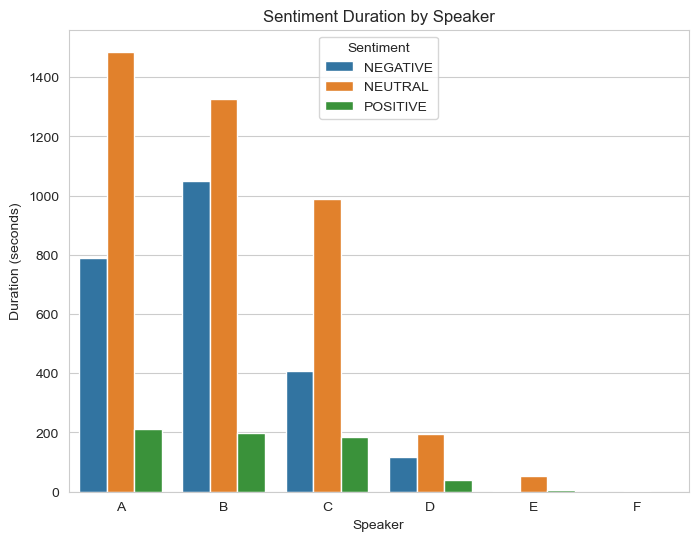

In [41]:
# Group the data by speaker and sentiment
grouped_data = labeled_data.groupby(['Speaker', 'Sentiment']).agg({'Duration': np.sum}).reset_index()

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(data=grouped_data, x='Speaker', y='Duration', hue='Sentiment')
plt.title('Sentiment Duration by Speaker')
plt.xlabel('Speaker')
plt.ylabel('Duration (seconds)')
plt.show()


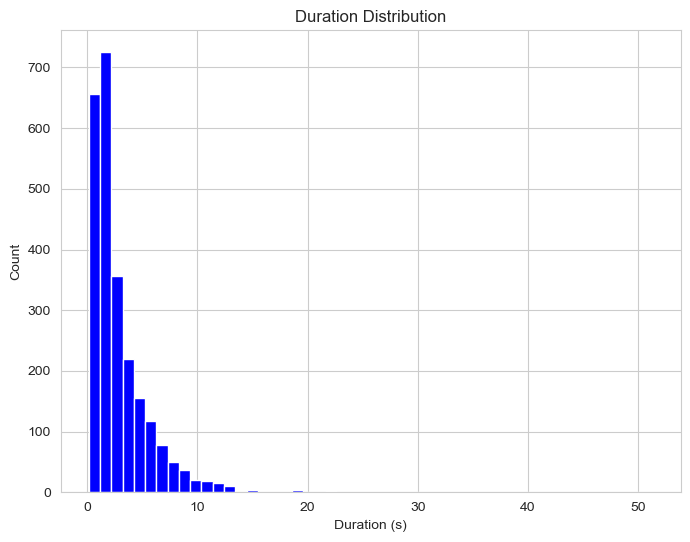

In [31]:
# Create a histogram of the duration distribution
plt.figure(figsize=(8,6))
plt.hist(data['Duration'], bins=50, color='blue')
plt.title("Duration Distribution")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()


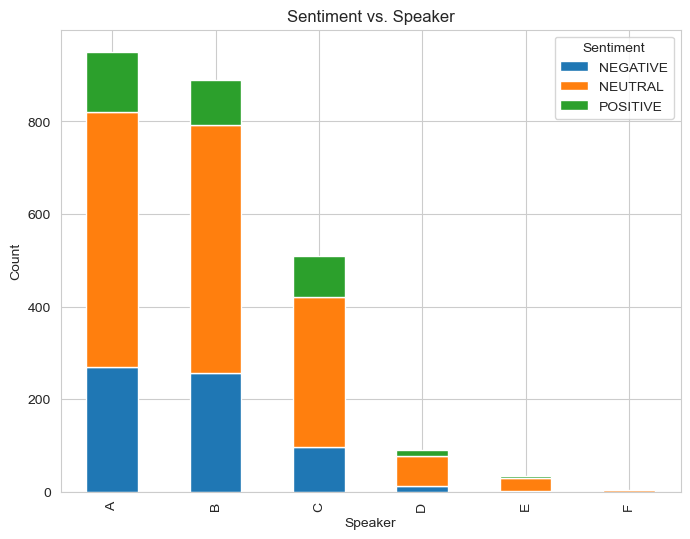

In [34]:
# Create a stacked bar chart of sentiment vs. speaker
sent_speak_counts = data.groupby(['Speaker', 'Sentiment']).size().unstack().fillna(0)
sent_speak_counts.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Sentiment vs. Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.show()


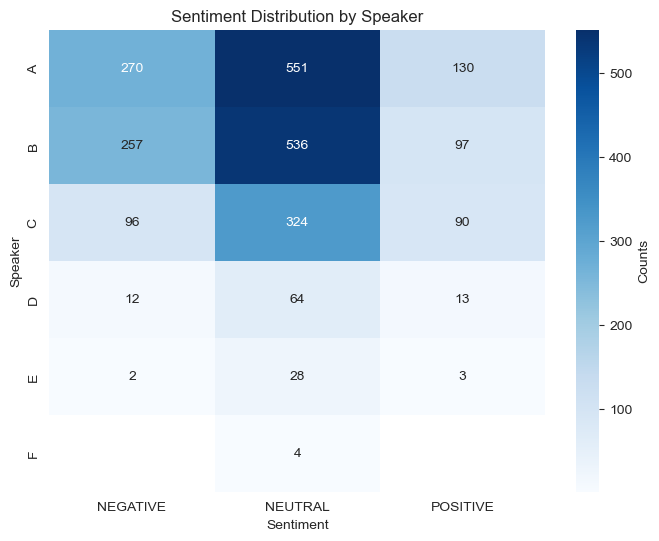

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by speaker and sentiment
grouped_data = labeled_data.groupby(['Speaker', 'Sentiment']).size().reset_index(name='Counts')

# Pivot the data to create a heatmap
pivoted_data = grouped_data.pivot(index='Speaker', columns='Sentiment', values='Counts')

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivoted_data, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Counts'})
plt.title('Sentiment Distribution by Speaker')
plt.xlabel('Sentiment')
plt.ylabel('Speaker')
plt.show()


<h1>DATA CLEANING</h1>

In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load data
df = pd.read_csv('labeled_data.csv')

# Convert to lowercase
df['Text'] = df['Text'].apply(lambda x: x.lower())

# Remove numbers
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\d+', '', x))

# Tokenize words
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: word_tokenize(x))
df['Text'] = df['Text'].apply(lambda x: [w for w in x if w not in stop_words])

# Lemmatize words
lemmatizer = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

# Join words back into string
df['Text'] = df['Text'].apply(lambda x: ' '.join(x))

# Save cleaned data
df.to_csv('clean_labeled_data.csv', index=False)

In [6]:
#Converting Sentiment into Binary_Sentiment
def label_to_binary(label):
    if label == 'POSITIVE':
        return 2
    elif label == 'NEGATIVE':
        return 1
    else:
        return 0

df['sentiment_binary'] = df['Sentiment'].apply(lambda x: label_to_binary(x))

<AxesSubplot:>

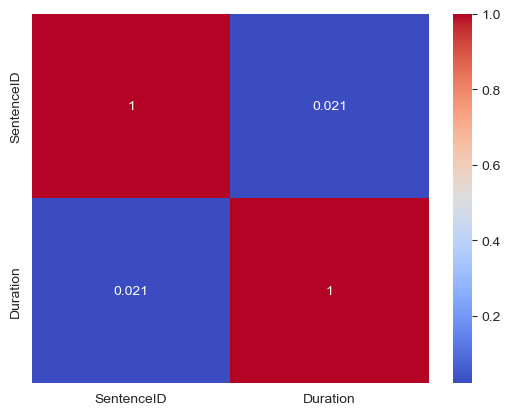

In [83]:
# compute pairwise correlation of columns
corr_matrix = df.corr()

# visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<h1>Predective Modeling</h1>



<h2>#1 Convolution Neural Network<h2>

In Convolution Neural Network Model First I declared on libraries and then Split data into Train Test sets where test size was <b>20%</b> of data then next step I <b>tokenized</b> all the data using keras tokenizer further I used <b>padding process</b> to ensure equal lengths of the inputs later Mapping the sentiment as data consist of three Sentiments i.e. <b>POSTIVE, NEGATIVE, NEUTRAL</b> a int number was assigned to them 0,1,2 respectively next step I defined the model architecture in which I preffred <b>activation function</b> as <b>"softmax"</b> and <b>Relu</b> for two different layers then I compied and trained model to get accuracy of the model as classification report.

In [17]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data and convert the sentences into sequences of integers
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['Text'])
X_train = tokenizer.texts_to_sequences(train_data['Text'])
X_test = tokenizer.texts_to_sequences(test_data['Text'])

# Pad the sequences to ensure equal length inputs
max_len = 100
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

# Map the sentiment labels to integers
sentiment_labels = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
y_train = np.array([sentiment_labels[label] for label in train_data['Sentiment']])
y_test = np.array([sentiment_labels[label] for label in test_data['Sentiment']])

# Define the CNN model architecture
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_test, y_test))

# Get predicted sentiment labels for test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract individual metrics
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Epoch 1/30
8/8 [==============================] - 2s 138ms/step - loss: 0.9746 - accuracy: 0.6128 - val_loss: 0.9489 - val_accuracy: 0.5907
Epoch 2/30
8/8 [==============================] - 1s 115ms/step - loss: 0.9155 - accuracy: 0.6128 - val_loss: 0.9285 - val_accuracy: 0.5907
Epoch 3/30
8/8 [==============================] - 1s 109ms/step - loss: 0.9025 - accuracy: 0.6128 - val_loss: 0.9272 - val_accuracy: 0.5907
Epoch 4/30
8/8 [==============================] - 1s 107ms/step - loss: 0.8874 - accuracy: 0.6133 - val_loss: 0.9067 - val_accuracy: 0.5907
Epoch 5/30
8/8 [==============================] - 1s 110ms/step - loss: 0.8599 - accuracy: 0.6164 - val_loss: 0.8845 - val_accuracy: 0.5927
Epoch 6/30
8/8 [==============================] - 1s 106ms/step - loss: 0.8123 - accuracy: 0.6517 - val_loss: 0.8362 - val_accuracy: 0.6250
Epoch 7/30
8/8 [==============================] - 1s 113ms/step - loss: 0.7376 - accuracy: 0.6986 - val_loss: 0.7715 - val_accuracy: 0.6714
Epoch 8/30
8/8 [====

<h2>Hyper Parameter Tuning for CNN

In [ ]:
#STEP 1 :

# Increase No. of Layers in model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))


#STEP 2 Tune Epochs:

model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_test, y_test))


Outcome of Hyperparameter tuning in thie case of CNN was there was rise in accuracy by 0.2% here I tuned the epochs size and added on additional layer also activation function "softmax"

<h2> Cross Validation for CNN

In [31]:

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data and convert the sentences into sequences of integers
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['Text'])
X = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(X, padding='post', maxlen=100)

# Map the sentiment labels to integers
sentiment_labels = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
y = np.array([sentiment_labels[label] for label in df['Sentiment']])

# Define the CNN model architecture
embedding_dim = 100
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=100))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=256)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Epoch 1/30


C:\Users\harsh\AppData\Local\Temp\ipykernel_6496\2316652758.py:36: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=256)


8/8 [==============================] - 1s 92ms/step - loss: 0.9657 - accuracy: 0.6219
Epoch 2/30
8/8 [==============================] - 1s 90ms/step - loss: 0.9081 - accuracy: 0.6204
Epoch 3/30
8/8 [==============================] - 1s 91ms/step - loss: 0.8996 - accuracy: 0.6204
Epoch 4/30
8/8 [==============================] - 1s 91ms/step - loss: 0.8764 - accuracy: 0.6209
Epoch 5/30
8/8 [==============================] - 1s 94ms/step - loss: 0.8468 - accuracy: 0.6239
Epoch 6/30
8/8 [==============================] - 1s 95ms/step - loss: 0.7958 - accuracy: 0.6577
Epoch 7/30
8/8 [==============================] - 1s 98ms/step - loss: 0.7149 - accuracy: 0.7097
Epoch 8/30
8/8 [==============================] - 1s 91ms/step - loss: 0.6161 - accuracy: 0.7587
Epoch 9/30
8/8 [==============================] - 1s 93ms/step - loss: 0.5098 - accuracy: 0.7860
Epoch 10/30
8/8 [==============================] - 1s 93ms/step - loss: 0.4092 - accuracy: 0.8440
Epoch 11/30
8/8 [=======================

8/8 [==============================] - 1s 104ms/step - loss: 0.0573 - accuracy: 0.9839
Epoch 24/30
8/8 [==============================] - 1s 124ms/step - loss: 0.0513 - accuracy: 0.9859
Epoch 25/30
8/8 [==============================] - 1s 103ms/step - loss: 0.0478 - accuracy: 0.9854
Epoch 26/30
8/8 [==============================] - 1s 106ms/step - loss: 0.0453 - accuracy: 0.9879
Epoch 27/30
8/8 [==============================] - 1s 101ms/step - loss: 0.0423 - accuracy: 0.9894
Epoch 28/30
8/8 [==============================] - 1s 104ms/step - loss: 0.0404 - accuracy: 0.9894
Epoch 29/30
8/8 [==============================] - 1s 110ms/step - loss: 0.0375 - accuracy: 0.9899
Epoch 30/30
16/16 [==============================] - 0s 5ms/step
Epoch 1/30
8/8 [==============================] - 1s 97ms/step - loss: 0.9810 - accuracy: 0.5959
Epoch 2/30
8/8 [==============================] - 1s 111ms/step - loss: 0.9143 - accuracy: 0.6065
Epoch 3/30
8/8 [==============================] - 1s 103ms/

<h3> Cross Validation Score
Cross-Validation Scores: [0.80846774 0.83064516 0.74747475 0.84848485 0.71919192]
Mean Accuracy: 0.7908528836754642

<h2>2 Long-Short-Term-Memory Model (LSTM) <h2>

In [40]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


# Convert the string labels to numerical labels
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Split the dataset into training and testing sets
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['Text'])

train_sequences = tokenizer.texts_to_sequences(train_df['Text'])
test_sequences = tokenizer.texts_to_sequences(test_df['Text'])

# Pad the sequences to make them the same length
max_length = max([len(seq) for seq in train_sequences + test_sequences])
train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_df['Sentiment'], num_classes=3)
test_labels = to_categorical(test_df['Sentiment'], num_classes=3)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_sequences, train_labels, validation_data=(test_sequences, test_labels), epochs=10, batch_size=32)


# Pad the testing sequences to make them the same length as the training sequences
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['Text']), maxlen=max_length, padding='post')

# Convert the testing labels to one-hot encoded vectors
y_test = pd.get_dummies(test_df['Sentiment']).values

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Epoch 1/10
62/62 [==============================] - 8s 72ms/step - loss: 0.9322 - accuracy: 0.6009 - val_loss: 0.8583 - val_accuracy: 0.6101
Epoch 2/10
62/62 [==============================] - 4s 58ms/step - loss: 0.7646 - accuracy: 0.6675 - val_loss: 0.6641 - val_accuracy: 0.7010
Epoch 3/10
62/62 [==============================] - 4s 58ms/step - loss: 0.4590 - accuracy: 0.8285 - val_loss: 0.5942 - val_accuracy: 0.7899
Epoch 4/10
62/62 [==============================] - 4s 57ms/step - loss: 0.2766 - accuracy: 0.9016 - val_loss: 0.5214 - val_accuracy: 0.8101
Epoch 5/10
62/62 [==============================] - 4s 58ms/step - loss: 0.1877 - accuracy: 0.9415 - val_loss: 0.5425 - val_accuracy: 0.8242
Epoch 6/10
62/62 [==============================] - 4s 58ms/step - loss: 0.1368 - accuracy: 0.9581 - val_loss: 0.5803 - val_accuracy: 0.8222
Epoch 7/10
62/62 [==============================] - 4s 58ms/step - loss: 0.1147 - accuracy: 0.9662 - val_loss: 0.6140 - val_accuracy: 0.8303
Epoch 8/10
62

<h2>Hyperparameter Tunning & Cross Validation for LSTM

In [41]:

# Define a function to create the model
def create_model(optimizer='adam', embedding_dim=64, lstm_units=64):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_length))
    model.add(Bidirectional(LSTM(lstm_units)))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters to tune
hyperparameters = {
    'optimizer': ['adam', 'rmsprop'],
    'embedding_dim': [32, 64, 128],
    'lstm_units': [32, 64, 128]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=hyperparameters, cv=3)
grid_search_result = grid_search.fit(train_sequences, train_labels)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search_result.best_params_)
print("Best score: ", grid_search_result.best_score_)


C:\Users\harsh\AppData\Local\Temp\ipykernel_6496\1032254062.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Best parameters:  {'embedding_dim': 32, 'lstm_units': 32, 'optimizer': 'adam'}
Best score:  0.8022219141324362


<h2>#3 Multi Layer_Perceptron<h2>

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
#data = pd.read_csv("your_dataset.csv")

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train['Text'])
X_test = vectorizer.transform(test['Text'])
y_train = train['Sentiment']
y_test = test['Sentiment']

# Build and train the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.71      0.70      0.70       137
           1       0.84      0.87      0.85       293
           2       0.78      0.68      0.73        66

    accuracy                           0.80       496
   macro avg       0.77      0.75      0.76       496
weighted avg       0.80      0.80      0.80       496



<h2> Hyperparameter Tuning for MLP

In [42]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train['Text'])
X_test = vectorizer.transform(test['Text'])
y_train = train['Sentiment']
y_test = test['Sentiment']

# Define the MLP classifier
mlp = MLPClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'max_iter': [1000, 5000],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters combination
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


Best Hyperparameters:
{'hidden_layer_sizes': (50,), 'max_iter': 1000}
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       137
           1       0.83      0.87      0.85       293
           2       0.79      0.67      0.72        66

    accuracy                           0.79       496
   macro avg       0.78      0.74      0.76       496
weighted avg       0.79      0.79      0.79       496



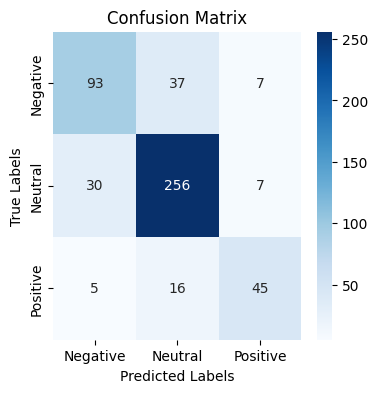

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

# Add labels, title, and axis ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])

plt.show()


<h4>Confusion Matrix based of Multi Layer Perceptron Result.<h4> 

A table that displays the effectiveness of your categorization model is called a confusion matrix. It provides a tabular summary of model's performance by contrasting the anticipated and actual values.

True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN) are the four components that commonly make up a confusion matrix. The number of accurate and inaccurate predictions produced by the model is shown in these sections.


True Positives (TP): In these situations, the model accurately identified the positive class (classified them as such).
False Positives (FP): These are instances where the model properly categorised something as negative when it actually belonged in the positive category.
True Negatives (TN): These are instances where the model accurately predicted (or correctly categorised) the negative class.

False Negatives (FN): These are instances when the model mistakenly categorised data as positive when it should have been negative.
The confusion matrix aids in your understanding of the sensitivity, specificity, accuracy, precision, and recall of your model. These are all crucial measurements to consider when assessing a classification model's effectiveness.


<h2>4 Decision Tree

In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

reviews = df['Text'].values
sentiments = df['sentiment_binary'].values

train_reviews = reviews[:500]
test_reviews = reviews[500:]
train_sentiments = sentiments[:500]
test_sentiments = sentiments[500:]

vectorizer = CountVectorizer(max_features=10000)
train_data = vectorizer.fit_transform(train_reviews).toarray()
test_data = vectorizer.transform(test_reviews).toarray()

model = DecisionTreeClassifier()

model.fit(train_data, train_sentiments)

train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

train_accuracy = accuracy_score(train_sentiments, train_predictions)
test_accuracy = accuracy_score(test_sentiments, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Train Classification Report:")
print(classification_report(train_sentiments, train_predictions))

print("Test Classification Report:")
print(classification_report(test_sentiments, test_predictions))


Train Accuracy: 0.988
Test Accuracy: 0.7076378351036925
Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       278
           1       1.00      0.99      1.00       152
           2       1.00      0.93      0.96        70

    accuracy                           0.99       500
   macro avg       0.99      0.97      0.98       500
weighted avg       0.99      0.99      0.99       500

Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      1229
           1       0.59      0.36      0.45       485
           2       0.78      0.48      0.60       263

    accuracy                           0.71      1977
   macro avg       0.70      0.58      0.62      1977
weighted avg       0.70      0.71      0.69      1977



<h2>Hyperparameter Tuning(K-Fold K=5) for Decision Tree

In [20]:
reviews = df['Text'].values
sentiments = df['sentiment_binary'].values

vectorizer = CountVectorizer(max_features=10000)
data = vectorizer.fit_transform(reviews).toarray()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(data):
    train_data, test_data = data[train_index], data[test_index]
    train_sentiments, test_sentiments = sentiments[train_index], sentiments[test_index]

    model = DecisionTreeClassifier()
    model.fit(train_data, train_sentiments)

    test_predictions = model.predict(test_data)

    print("Classification Report:")
    print(classification_report(test_sentiments, test_predictions))
    print("-" * 50)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       293
           1       0.72      0.70      0.71       137
           2       0.81      0.73      0.77        66

    accuracy                           0.80       496
   macro avg       0.79      0.76      0.78       496
weighted avg       0.80      0.80      0.80       496

--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       306
           1       0.75      0.68      0.71       118
           2       0.77      0.74      0.75        72

    accuracy                           0.81       496
   macro avg       0.79      0.76      0.77       496
weighted avg       0.81      0.81      0.81       496

--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0

--------------------------------------------------

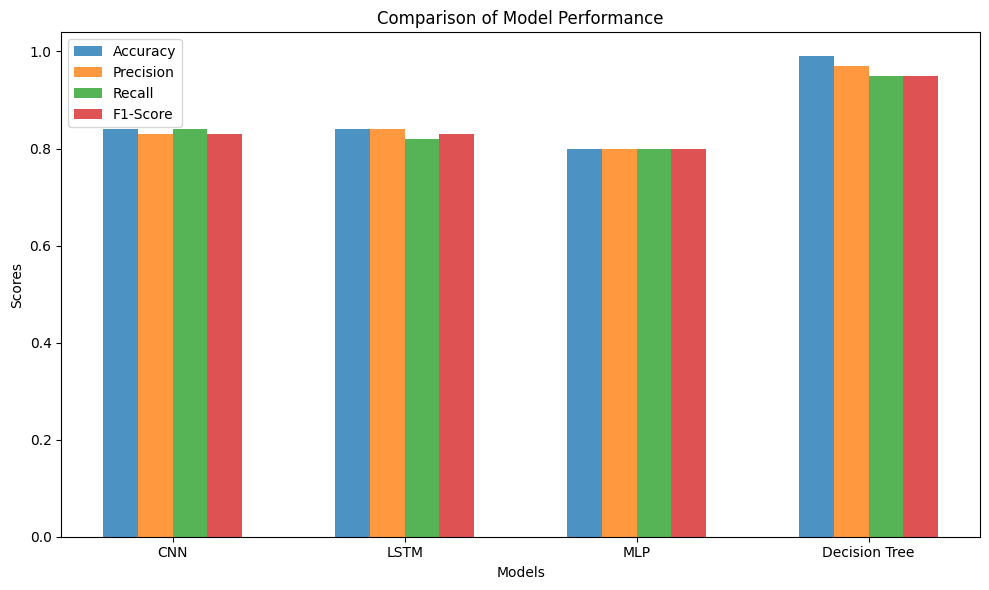

In [54]:

import matplotlib.pyplot as plt
import numpy as np

# Model names and performance metrics
models = ['CNN', 'LSTM', 'MLP', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = np.array([[0.84, 0.83, 0.84, 0.83],
                   [0.84, 0.84, 0.82, 0.83],
                   [0.80, 0.80, 0.80, 0.80],
                   [0.99, 0.97, 0.95, 0.95]])

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(models))
bar_width = 0.15
opacity = 0.8

# Plotting the bar chart
for i in range(len(metrics)):
    ax.bar(index + (i * bar_width), scores[:, i], bar_width, alpha=opacity, label=metrics[i])

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()


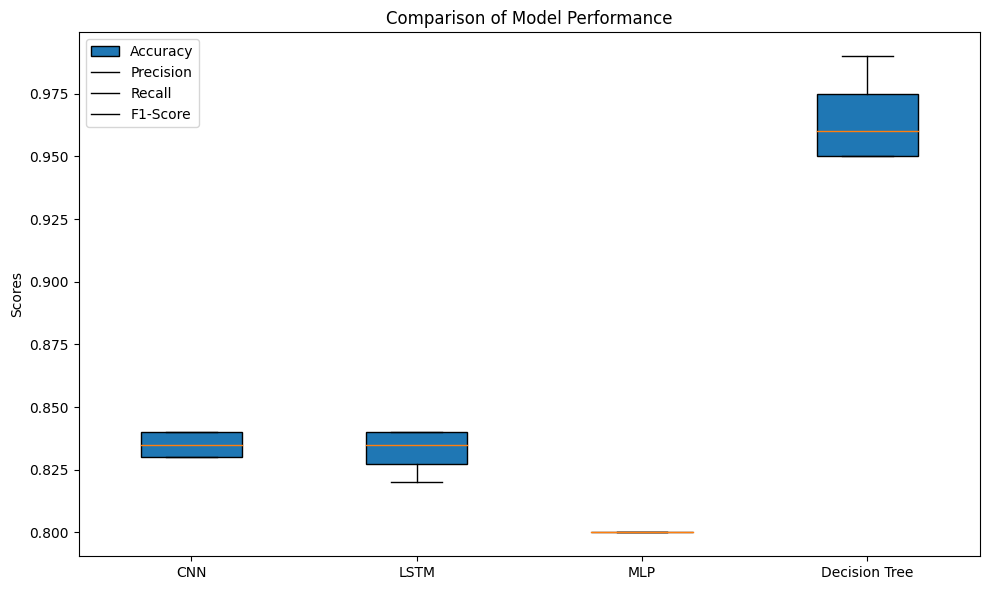

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and performance metrics
models = ['CNN', 'LSTM', 'MLP', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = np.array([[0.84, 0.83, 0.84, 0.83],
                   [0.84, 0.84, 0.82, 0.83],
                   [0.80, 0.80, 0.80, 0.80],
                   [0.99, 0.97, 0.95, 0.95]])

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the box plot
ax.boxplot(scores.T, patch_artist=True)

# Adding labels, title, and legend
ax.set_xticklabels(models)
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.legend(metrics)

# Displaying the chart
plt.tight_layout()
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_6496\1841689255.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


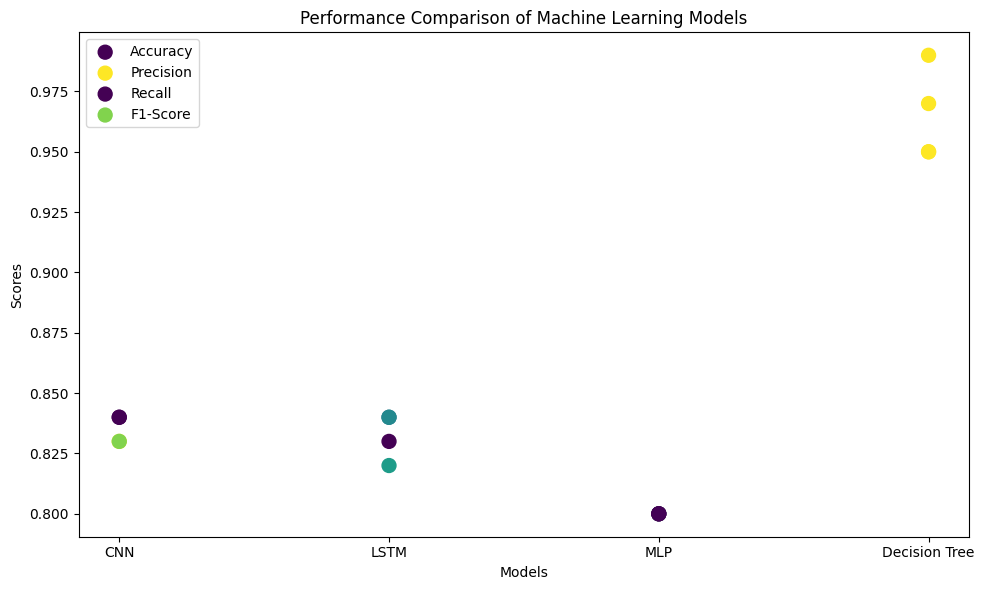

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and performance metrics
models = ['CNN', 'LSTM', 'MLP', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = np.array([[0.84, 0.83, 0.84, 0.83],
                   [0.84, 0.84, 0.82, 0.83],
                   [0.80, 0.80, 0.80, 0.80],
                   [0.99, 0.97, 0.95, 0.95]])

# Creating the figure and axes for the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a colormap for models
colormap = plt.cm.get_cmap('tab10')

# Plotting the scatter plot
for i, metric in enumerate(metrics):
    x = np.arange(len(models))
    y = scores[:, i]
    ax.scatter(x, y, c=colormap(i), label=metric, s=100)

# Adding labels and ticks
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Machine Learning Models')
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models)
ax.legend()

# Displaying the scatter plot
plt.tight_layout()
plt.show()


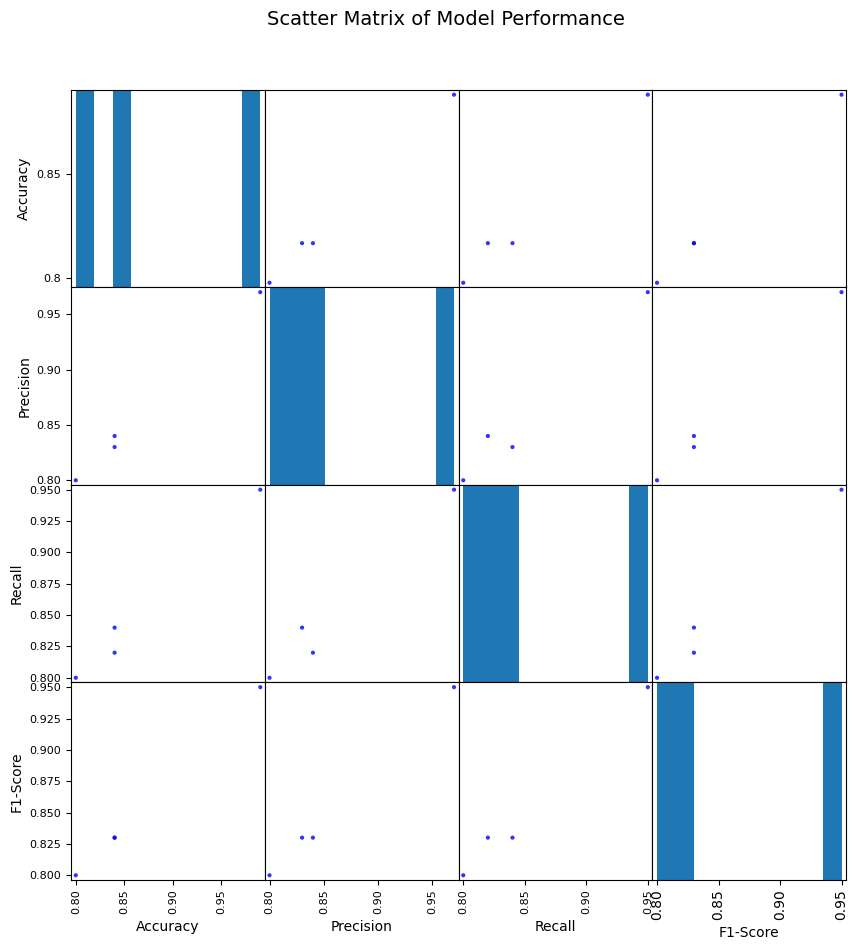

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Model names and performance metrics
models = ['CNN', 'LSTM', 'MLP', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = np.array([[0.84, 0.83, 0.84, 0.83],
                   [0.84, 0.84, 0.82, 0.83],
                   [0.80, 0.80, 0.80, 0.80],
                   [0.99, 0.97, 0.95, 0.95]])

# Creating a DataFrame for the scores
df = pd.DataFrame(scores, columns=metrics, index=models)

# Creating the scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='hist', alpha=0.8, c='b')

# Customizing the scatter matrix
for i in range(len(metrics)):
    for j in range(len(metrics)):
        if i != j:
            scatter_matrix[i, j].set_alpha(0.5)
        else:
            scatter_matrix[i, j].set_ylim(0, 1)

# Adding labels and ticks
plt.suptitle('Scatter Matrix of Model Performance', fontsize=14)
plt.subplots_adjust(top=0.9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Displaying the scatter matrix
plt.show()
